## Observations and Insights 

1. Infubinol would appear to have the least efficacy based on its greater skews in tumor size compared to the other treatments. However, it should also be noted that 
2. It generally appears that weight and average tumor volume are positively correlated in regard to Capomulin treatment. This could be a limitation in human efficacy, creating a maximum weight a person could be for positive treatment results.
3. Still, Capomulin is one of the more promising treatments of the four examined, having lower final tumor volume and two outliers in its dataset that are even lower than the general skew.

In [27]:
%matplotlib inline

In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mousedata = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
merged_mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice.
merged_mousedata.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mousedata = merged_mousedata[merged_mousedata.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mousedata = merged_mousedata[merged_mousedata['Mouse ID'] != 'g989']
cleaned_mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
# Checking the number of mice in the clean DataFrame.
cleaned_mousedata.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = cleaned_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleaned_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
st_dev = cleaned_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
m_var = cleaned_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
m_sem = cleaned_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({'Mean':mean, 'Median':median, 'Variance':m_var, 'St. Dev':st_dev, 'SEM':m_sem})

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table

,Mean,Median,Variance,St. Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_table = cleaned_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', 'sem'])
agg_table

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

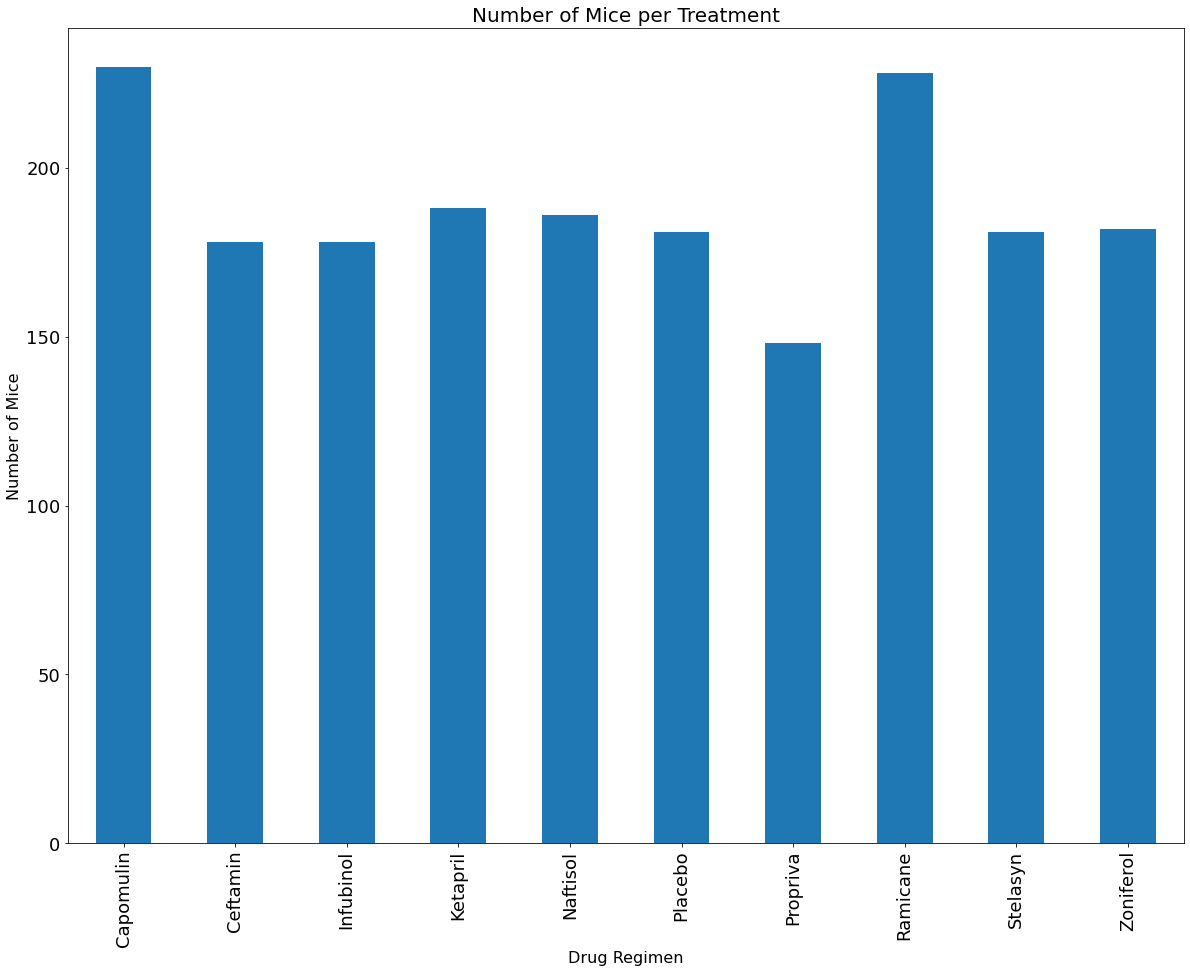

In [139]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#count mice per treatment
mice_groups = cleaned_mousedata.groupby('Drug Regimen')['Mouse ID'].count()

#plot bar
mice_groups.plot.bar(figsize=(20,15), fontsize=18, align='center')
plt.xlabel('Drug Regimen', fontsize=16)
plt.ylabel('Number of Mice', fontsize=16)
plt.title('Number of Mice per Treatment', fontsize=20);

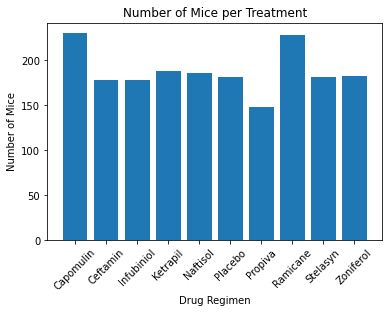

In [138]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#list number of mice per regimen
mice_list = cleaned_mousedata.groupby('Drug Regimen')['Mouse ID'].count().tolist()
#create x-axis of length of drug regimens
x_axis = np.arange(len(mice_list))
#plot bar graph
plt.bar(x_axis, mice_list, align='center')
# set x_axis ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubiniol', 'Ketrapil', 'Naftisol', 'Placebo', 'Propiva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation=45)
# label axes and graph
plt.title('Number of Mice per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice');

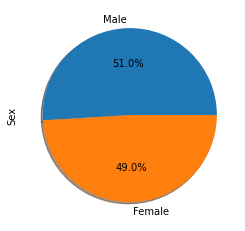

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
cleaned_mousedata.Sex.value_counts().plot.pie(y='Sex', autopct="%1.1f%%", shadow=True);

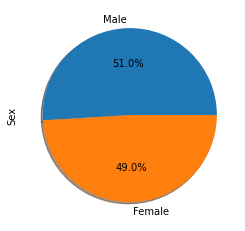

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create sections of pie plot
labels = ['Male', 'Female']
sex_counts = cleaned_mousedata.Sex.value_counts()
#plot pie
plt.pie(sex_counts, labels=labels, autopct="%1.1f%%", shadow=True)
plt.ylabel('Sex');

## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_times = cleaned_mousedata.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
time_df = pd.merge(max_times, cleaned_mousedata, how='outer', on=['Timepoint', 'Mouse ID'])

In [114]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_rows = time_df.loc[time_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # add subset 
    tumor_vol.append(drug_rows)
    # Determine outliers using upper and lower bounds
    #calculate quartiles
    quartiles = drug_rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    #calculate lowre and upper bounds
    low_bound = lowerq - (1.5*iqr)
    up_bound = upperq + (1.5*iqr)
    #print findings
    print(f"{drug}'s potential outliers: {low_bound} / {up_bound}")
    #reset
    low_bound = 0
    up_bound = 0

Capomulin's potential outliers: 26.714832162499995 / 55.9711007025
Ramicane's potential outliers: 24.18658646249998 / 57.48804812250001
Infubinol's potential outliers: 32.309217298749985 / 72.31757996875001
Ceftamin's potential outliers: 32.818911426250004 / 71.19095325625


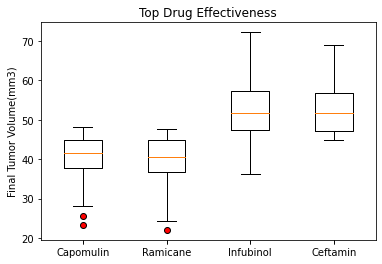

In [141]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Top Drug Effectiveness')
ax1.set_ylabel('Final Tumor Volume(mm3)')
plt.xticks([1, 2, 3, 4], drugs)
red_circle = dict(markerfacecolor='red', marker='o')
ax1.boxplot(tumor_vol, labels=drugs, flierprops=red_circle)
plt.show()

## Line and Scatter Plots

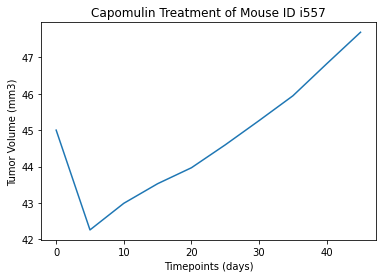

In [117]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#create loc of capomulin treated mice
capomulin_df = cleaned_mousedata.loc[cleaned_mousedata['Drug Regimen'] == 'Capomulin']
#find specific mouse id i557
one_mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'i557']
#isolate timepoint and tumor volume variables
one_timepoint = one_mouse_df['Timepoint']
one_tv = one_mouse_df['Tumor Volume (mm3)']
# Give our graph axis labels
plt.xlabel('Timepoints (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse ID i557')
# Have to plot our chart once again as it doesn't stick after being shown
plt.plot(one_timepoint, one_tv)
plt.show()

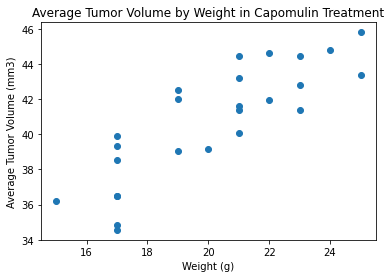

In [135]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight_ave = capomulin_df.groupby('Mouse ID').mean()
weights = capomulin_weight_ave['Weight (g)']
ave_tv = capomulin_weight_ave['Tumor Volume (mm3)']
#plot scatter
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight in Capomulin Treatment')
plt.scatter(weights, ave_tv);

## Correlation and Regression

The correlation coefficient between weight and average tumor volume is 0.84.


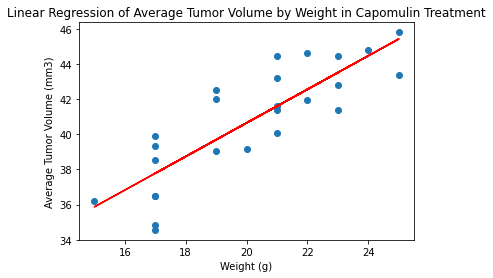

In [137]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_corr = round(st.pearsonr(weights, ave_tv)[0],2)
print(f"The correlation coefficient between weight and average tumor volume is {capomulin_corr}.")

slope, intercept, r_value, p_value, stderr = linregress(weights, ave_tv)
regress_values = slope * weights + intercept

#plot scatter with linear regression
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Linear Regression of Average Tumor Volume by Weight in Capomulin Treatment')
plt.plot(weights, regress_values, color='red')
plt.scatter(weights, ave_tv);